In [26]:
import CalculatedFieldSubroutines as cfs

#

import numpy as np

import pandas as pd

#

import matplotlib.pyplot as plt

from pandasgui import show

import plotly.express as px

#

import warnings

In [27]:
warnings.filterwarnings( 'ignore' )

In [28]:
gmID_list = cfs.list_whitelisted_gmIDs()

In [29]:
topic_list = cfs.list_topics()

print( topic_list )

['/apollo/canbus/chassis', '/apollo/drive/event', '/apollo/sensor/gnss/best/pose', '/apollo/perception/traffic/light']


In [30]:
red_route_best_pose_df_list = []

green_route_best_pose_df_list = []

blue_route_best_pose_df_list = []

for gmID in gmID_list:

    current_gmID_best_pose_df = cfs.retrieve_gmID_topic( gmID, '/apollo/sensor/gnss/best/pose' )

    current_gmID_best_pose_df = current_gmID_best_pose_df.sort_values( 'time' )
    
    route = cfs.give_route( gmID )
    
    if ( route == 'Red' ):

        red_route_best_pose_df_list.append( current_gmID_best_pose_df )

    elif ( route == 'Green' ):

        green_route_best_pose_df_list.append( current_gmID_best_pose_df )

    else:

        blue_route_best_pose_df_list.append( current_gmID_best_pose_df )

In [31]:
red_route_nan_best_pose_df_list = []

for df in red_route_best_pose_df_list:

    nan = cfs.ProgressAlongRoute_v2( df )

    if ( nan == True ):

        red_route_nan_best_pose_df_list.append( df )

In [37]:
concat_red_route_nan_best_pose_dfs = pd.DataFrame()

for index, df in enumerate( red_route_nan_best_pose_df_list[ : : -1 ] ):

    cfs.NormalizedTime( df )

    print( index, df[ 'groupMetadataID' ][ 0 ], len( np.isnan( np.array( df[ 'ProgressAlongRoute' ] ) ) ) )

    temp_df = df[ df[ 'ProgressAlongRoute' ].isnull() ]

    concat_red_route_nan_best_pose_dfs = pd.concat( [ concat_red_route_nan_best_pose_dfs, temp_df ] )  

0 7fb7b9c0-c881-11ee-a7fc-dd032dba19e8 1930
1 622bd2e8-f0e4-11ee-ba1f-fb353e7798cd 321
2 05c7c824-cab8-11ee-aa4d-1d66adf2f0c7 197
3 85b6e70e-ef7a-11ee-b966-fb353e7798cd 2149
4 e7b934a8-ef1a-11ee-9385-ef789ffde1d3 2096
5 aa5dbcd2-ef10-11ee-9385-ef789ffde1d3 1628
6 219f7eb8-ef87-11ee-b966-fb353e7798cd 2488
7 8347b862-efad-11ee-b966-fb353e7798cd 1576
8 fc211bb2-efca-11ee-b966-fb353e7798cd 1607
9 d3698592-ef9d-11ee-b966-fb353e7798cd 1802
10 3d2d29ec-ef95-11ee-b966-fb353e7798cd 1521
11 fd1ab258-efa7-11ee-b966-fb353e7798cd 1839


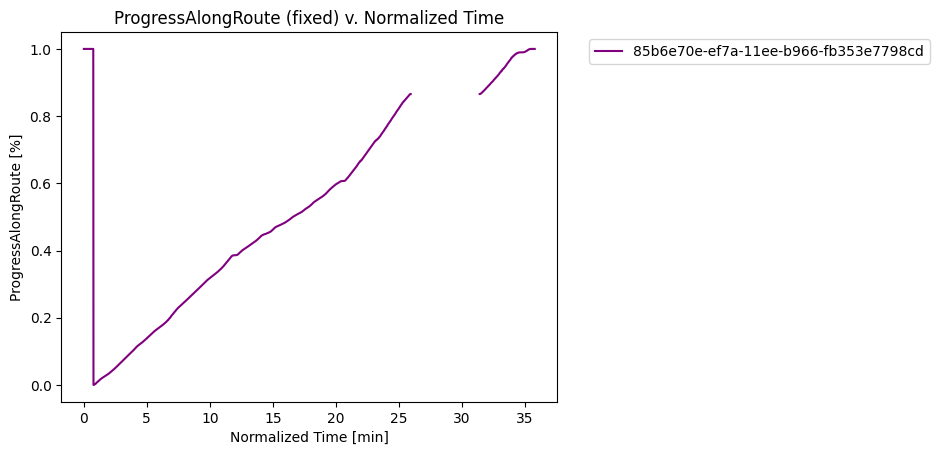

In [73]:
index = 8

plt.plot( red_route_nan_best_pose_df_list[ index ][ 'NormalizedTime' ] * 1.66667e-11, 
          red_route_nan_best_pose_df_list[ index ][ 'ProgressAlongRoute' ],
          label = red_route_nan_best_pose_df_list[ index ][ 'groupMetadataID' ][ 0 ],
          color = 'purple')

plt.title( 'ProgressAlongRoute (fixed) v. Normalized Time' )

plt.xlabel( 'Normalized Time [min]' )

plt.ylabel( 'ProgressAlongRoute [%]' )

plt.legend( bbox_to_anchor = ( 1.05, 1.0 ), loc = 'upper left' )

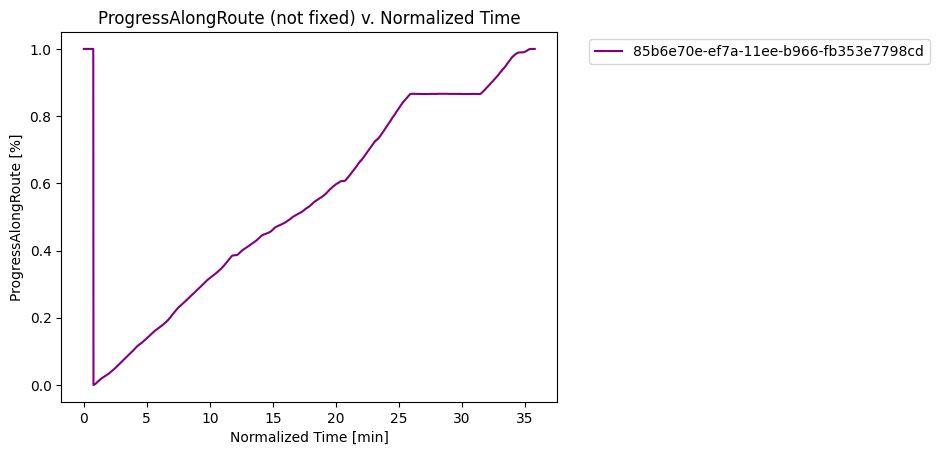

In [74]:
df = red_route_nan_best_pose_df_list[ index ].copy()

cfs.NormalizedTime( df )

reference_red_route_best_pose_df = cfs.retrieve_gmID_topic( '9798fe24-f143-11ee-ba78-fb353e7798cd', '/apollo/sensor/gnss/best/pose' )

cfs.ProgressAlongRoute( df, reference_red_route_best_pose_df )

plt.plot( df[ 'NormalizedTime' ] * 1.66667e-11, 
          df[ 'ProgressAlongRoute' ],
          label = df[ 'groupMetadataID' ][ 0 ],
          color = 'purple' )

plt.title( 'ProgressAlongRoute (not fixed) v. Normalized Time' )

plt.xlabel( 'Normalized Time [min]' )

plt.ylabel( 'ProgressAlongRoute [%]' )

plt.legend( bbox_to_anchor = ( 1.05, 1.0 ), loc = 'upper left' )

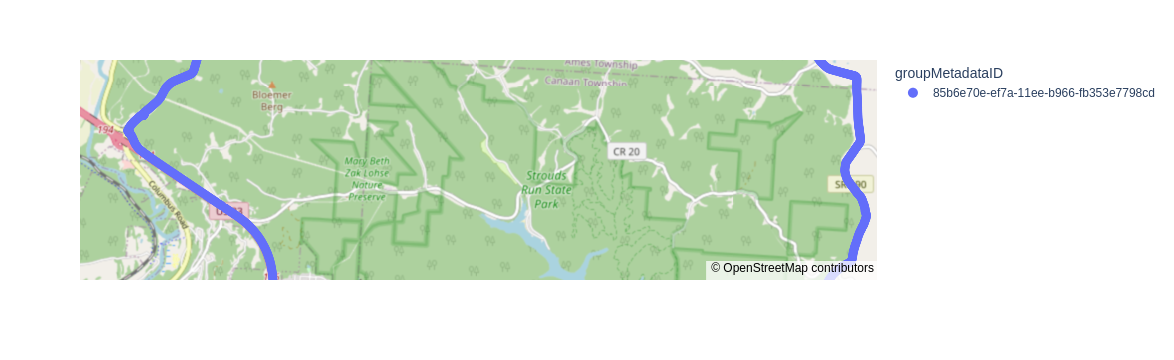

In [69]:
fig = px.scatter_mapbox(
                        red_route_nan_best_pose_df_list[ index ], 
                        lat = 'latitude', 
                        lon = 'longitude', 
                        color = 'groupMetadataID',
                        hover_data = [ 'ProgressAlongRoute' ],
                        opacity = 1,
                        zoom = 12, 
                        height = 1000, 
                        mapbox_style = 'open-street-map'
                       )

fig.update_traces( marker = dict( size = 10 ) )

fig.show()

In [10]:
blue_route_nan_best_pose_df_list = []

for df in blue_route_best_pose_df_list:

    nan = cfs.ProgressAlongRoute_v2( df )

    if ( nan == True ):

        blue_route_nan_best_pose_df_list.append( df )

In [11]:
concat_blue_route_nan_best_pose_dfs = pd.DataFrame()

for index, df in enumerate( blue_route_nan_best_pose_df_list ):

    cfs.NormalizedTime( df )

    print( index, df[ 'groupMetadataID' ][ 0 ], len( np.isnan( np.array( df[ 'ProgressAlongRoute' ] ) ) ) )

    temp_df = df[ df[ 'ProgressAlongRoute' ].isnull() ]

    concat_blue_route_nan_best_pose_dfs = pd.concat( [ concat_blue_route_nan_best_pose_dfs, temp_df ] )  

0 286c70cc-d2f7-11ee-b437-336917683bb8 2204
1 58263e34-a45c-11ee-88ec-eb6a8d5269b4 2011
2 64737d98-d312-11ee-b437-336917683bb8 1474
3 154fab12-a43f-11ee-88ec-eb6a8d5269b4 575


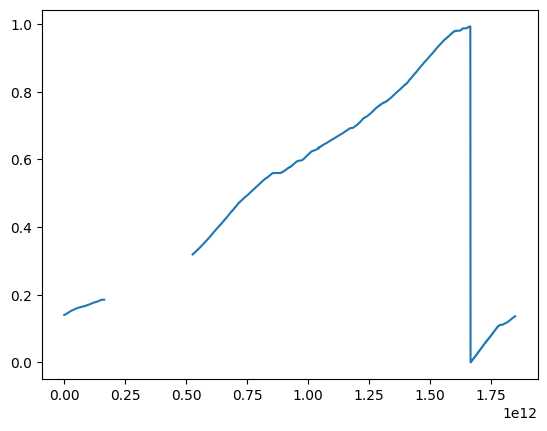

In [12]:
plt.plot( blue_route_nan_best_pose_df_list[ 2 ][ 'NormalizedTime' ], blue_route_nan_best_pose_df_list[ 2 ][ 'ProgressAlongRoute' ] )

plt.show()

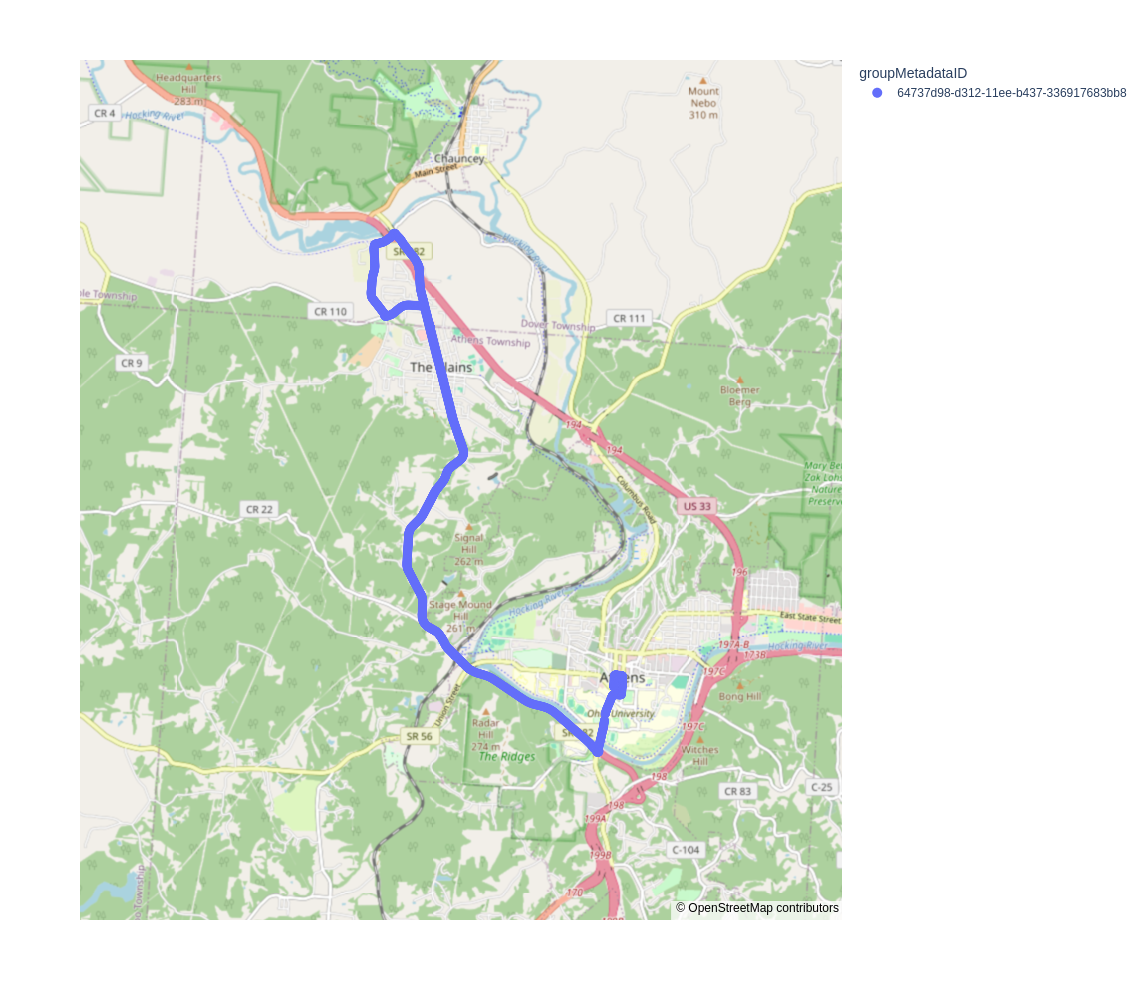

In [13]:
fig = px.scatter_mapbox(
                        blue_route_nan_best_pose_df_list[ 2 ], 
                        lat = 'latitude', 
                        lon = 'longitude', 
                        color = 'groupMetadataID',
                        hover_data = [ 'ProgressAlongRoute', 'NormalizedTime' ],
                        opacity = 1,
                        zoom = 12, 
                        height = 1000, 
                        mapbox_style = 'open-street-map'
                       )

fig.update_traces( marker = dict( size = 10 ) )

fig.show()

In [14]:
len( red_route_nan_best_pose_df_list )

12

In [18]:
index = 10

#

example_blue_route_gmID = blue_route_best_pose_df_list[ index ][ 'groupMetadataID' ][ 0 ]

#

example_blue_route_best_pose_df_v1 = blue_route_best_pose_df_list[ index ].copy()

cfs.NormalizedTime( example_blue_route_best_pose_df_v1 )

reference_blue_route_best_pose_df = cfs.retrieve_gmID_topic( '3d2a80f0-ec81-11ee-b297-3b0ad9d5d6c6', '/apollo/sensor/gnss/best/pose' )

cfs.ProgressAlongRoute( example_blue_route_best_pose_df_v1, reference_blue_route_best_pose_df )

#

example_blue_route_best_pose_df_v2 = blue_route_best_pose_df_list[ index ].copy()

cfs.NormalizedTime( example_blue_route_best_pose_df_v2 )

cfs.ProgressAlongRoute_v2( example_blue_route_best_pose_df_v2 )

False

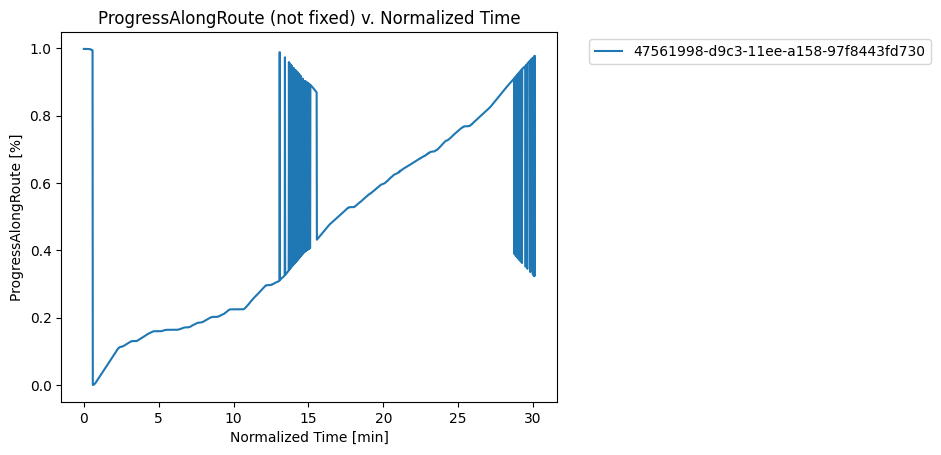

In [19]:
plt.plot( example_blue_route_best_pose_df_v1[ 'NormalizedTime' ] * 1.66667e-11, 
          example_blue_route_best_pose_df_v1[ 'ProgressAlongRoute' ],
          label = example_blue_route_gmID )

plt.title( 'ProgressAlongRoute (not fixed) v. Normalized Time' )

plt.xlabel( 'Normalized Time [min]' )

plt.ylabel( 'ProgressAlongRoute [%]' )

plt.legend( bbox_to_anchor = ( 1.05, 1.0 ), loc = 'upper left' )

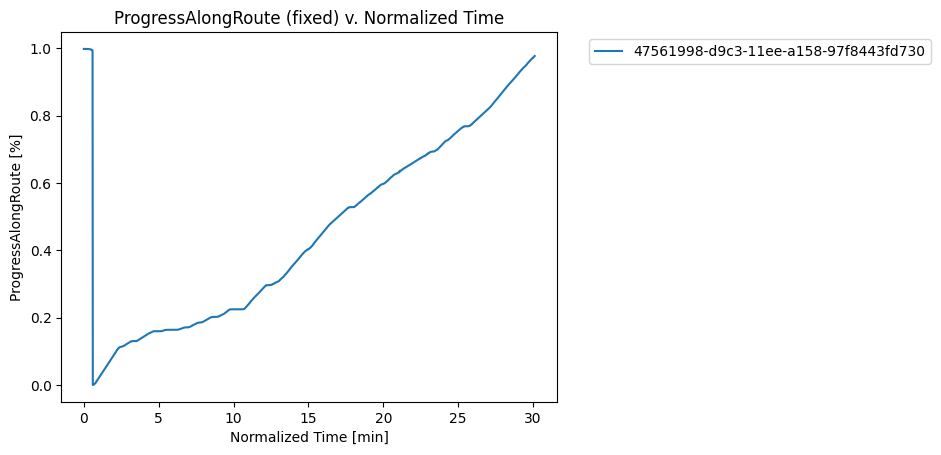

In [20]:
plt.plot( example_blue_route_best_pose_df_v2[ 'NormalizedTime' ] * 1.66667e-11, 
          example_blue_route_best_pose_df_v2[ 'ProgressAlongRoute' ],
          label = example_blue_route_gmID )

plt.title( 'ProgressAlongRoute (fixed) v. Normalized Time' )

plt.xlabel( 'Normalized Time [min]' )

plt.ylabel( 'ProgressAlongRoute [%]' )

plt.legend( bbox_to_anchor = ( 1.05, 1.0 ), loc = 'upper left' )